<a href="https://colab.research.google.com/github/Dhiyaneshraj06/data-science-tasks/blob/main/Task_1_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [41]:
df=pd.read_csv("/content/Titanic-Dataset.csv")


df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.shape


(891, 12)

In [45]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('X', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

<ipython-input-45-856f36768f98>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-45-856f36768f98>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [27]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
SibSp,7
Parch,7
Ticket,681
Fare,248
Embarked,3


In [28]:
df.describe()


,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


**From the above observation we can notice how many unique values are present and we can see number of rows and columns and moreover there are some null values present in the data**

**Now lets check how many passengers survived 1 indicates "SURVIVED" and 0 indicates "NOT SURVIVED"**

In [29]:
df['Survived'].value_counts()


,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

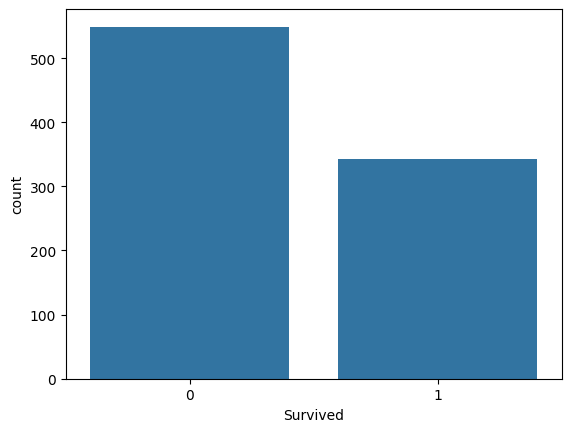

In [30]:
sns.countplot(df,x='Survived')


<Axes: xlabel='Survived', ylabel='count'>

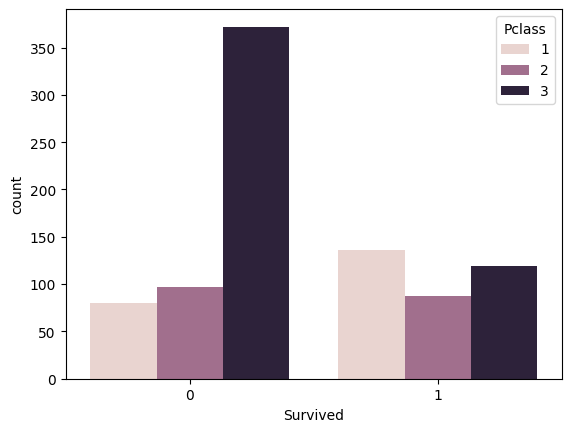

In [31]:
sns.countplot(df,x='Survived',hue='Pclass')


**The pictorial representation of survial rate has been mentioned above ,first gives overall survival rate and second graph gives class based survival rate**

**Now lets check male and female survival rate in seperate**

<Axes: xlabel='Sex', ylabel='count'>

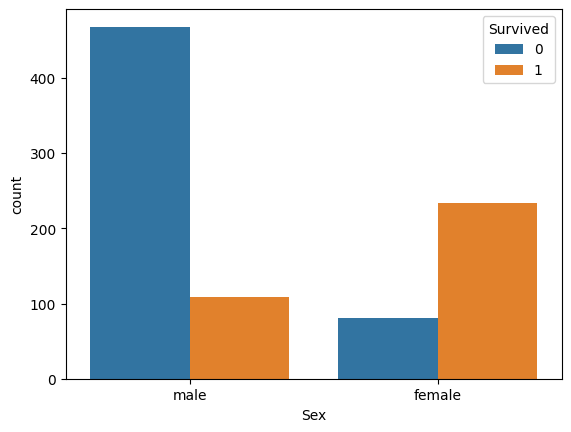

In [32]:
sns.countplot(df,x='Sex',hue='Survived')

**Here we can clearly able to see female survival rate is high**

In [33]:
from sklearn.preprocessing import LabelEncoder
df_label=LabelEncoder()
df['Sex']=df_label.fit_transform(df['Sex'])
df['Sex']

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [46]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **SUPPORT VECTOR MACHINE**

In [48]:
# Create a pipeline for preprocessing and modeling
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

# Preprocessing for numeric data: Impute missing values and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: Impute missing values and encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [49]:
#Create a complete pipeline with preprocessing and model (SVM)
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', SVC())])

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

# Predict with SVM model
y_pred_svm = svm_pipeline.predict(X_test)


print("\nSupport Vector Machine Predictions:")
predicted_svm_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})
print(predicted_svm_df.reset_index(drop=True))


Support Vector Machine Predictions:
     Actual  Predicted
0         1          0
1         0          0
2         0          0
3         1          1
4         1          1
..      ...        ...
174       0          0
175       0          0
176       1          0
177       1          1
178       1          1

[179 rows x 2 columns]


In [50]:
print("\nSupport Vector Machine Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine Metrics:
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[91 14]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# LOGISTIC REGRESSION

In [51]:
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', LogisticRegression())])

# Train the Logistic Regression model
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [52]:
y_pred_logistic = logistic_pipeline.predict(X_test)


In [53]:
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Metrics:
Accuracy: 0.7877094972067039
Confusion Matrix:
 [[90 15]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

